In [48]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
train_df = pd.read_csv('train_values.csv', index_col=0, parse_dates=['timestamp'])

/home/giles/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train_df['process_id'].nunique()

5021

In [5]:
train_df['object_id'].nunique()

94

In [13]:
train_df['pipeline'].nunique()

11

In [26]:
machines = set(train_df['object_id'])
phases = set(train_df['phase'])

measurements = list(train_df.select_dtypes(include='float').columns)

machine_stats = []
for machine in tqdm_notebook(machines, total=len(machines)):
    machine_filtered_df = train_df[train_df['object_id'] == machine]
    
    for phase in phases:
        phase_filtered_df = machine_filtered_df[machine_filtered_df['phase'] == phase]
        
        # Get the average number of measurements
        avg_measurements = phase_filtered_df.groupby(['process_id']).count().mean().values[0]
        
        # Get the average values for the float columns
        avg_values = list(phase_filtered_df.groupby(['process_id'])[measurements].mean().mean().values)
        
        machine_stats.append([machine, phase, avg_measurements] + avg_values)

/home/giles/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [36]:
machine_stats_df[machine_stats_df['phase'] == 'acid']

,machine,phase,nr_measurements,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_acid,tank_lsh_pre_rinse
1,102,acid,197.510204,5152.494400,0.827433,65.476550,37.121459,0.802267,4541.681821,53.359692,42.947432,44.694957,43.644740,28.513627,82.481516,72.650364,45.378654,44.364303,0.0,0.0
6,103,acid,348.428571,9478.685002,1.686335,64.463704,29.727862,2.355550,7697.078630,52.860894,43.640953,45.238039,46.996749,28.980677,82.535412,72.697329,45.347099,44.696440,0.0,0.0
11,107,acid,293.100000,19213.009217,1.584452,62.709531,27.368786,1.245406,13756.492789,53.082698,42.786069,43.624320,42.774395,28.915557,82.404773,72.624394,45.279332,44.454869,0.0,0.0
16,108,acid,237.800000,20520.926346,1.575240,61.965034,30.491038,1.369971,16675.530440,53.155099,42.916210,44.763362,42.893708,28.557835,82.478016,72.563024,45.243362,44.648360,0.0,0.0
21,109,acid,129.315789,23508.879945,3.233139,58.661036,35.344944,0.543256,23215.626681,52.768111,43.094272,44.761136,45.325659,28.459165,82.574306,72.568971,45.155259,44.668453,0.0,0.0
26,110,acid,243.850000,11261.765070,1.745638,62.263962,31.063589,1.795150,10167.642698,52.978215,42.286102,44.351779,45.513899,28.974584,82.558960,72.665858,45.359632,44.650426,0.0,0.0
31,111,acid,295.500000,10719.378090,1.536806,64.533265,31.413822,1.248549,8723.321564,52.770982,43.426143,43.928291,43.610118,29.146170,82.610244,72.594589,45.251938,44.441266,0.0,0.0
36,112,acid,240.120000,3618.668869,1.137050,43.507342,23.764513,1.298875,3700.277850,53.715589,43.097115,44.067450,42.720319,28.643868,82.559164,72.569198,45.263936,44.422251,0.0,0.0
41,113,acid,257.686275,3529.289062,1.353338,42.625249,23.242761,1.240117,3366.220907,53.220817,42.458977,44.151732,42.126832,28.469048,82.495168,72.564296,45.164039,44.534353,0.0,0.0
46,114,acid,528.973684,1950.543436,2.273555,75.977804,36.002186,1.508328,1732.692047,54.831416,42.929230,44.771331,43.777795,28.292178,82.424875,72.641835,45.310543,44.519068,0.0,0.0


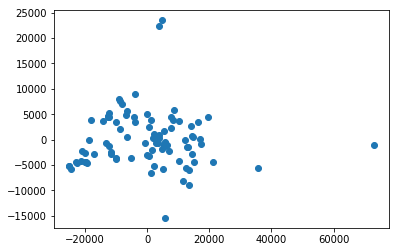

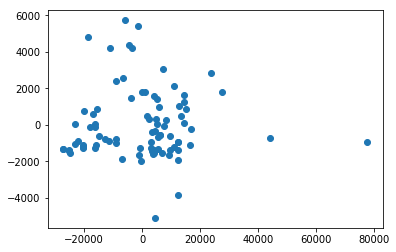

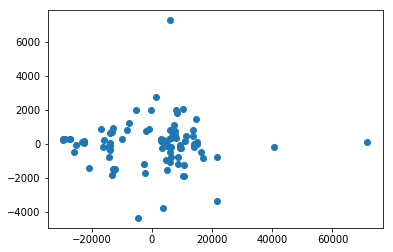

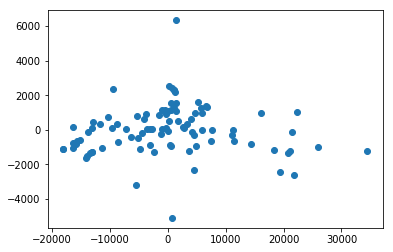

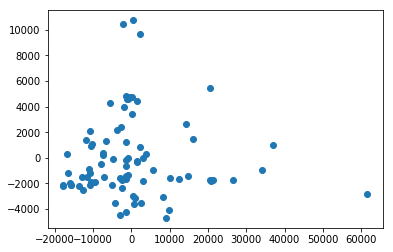

In [34]:
from sklearn.decomposition import PCA

machine_stats_df = pd.DataFrame(machine_stats, columns=['machine', 'phase', 'nr_measurements'] + measurements)
machine_stats_df = machine_stats_df.dropna()

for phase in phases:
    machine_stats_phase = machine_stats_df[machine_stats_df['phase'] == phase]
    
    pca = PCA(n_components=2)
    
    X_pca = pca.fit_transform(machine_stats_phase.drop(['phase', 'machine'], axis=1))
    
    plt.figure()
    plt.scatter(x=[x[0] for x in X_pca], y=[x[1] for x in X_pca])
    plt.show()

In [25]:
train_df[(train_df['phase'] == 'acid') & (train_df['object_id'] == 102)].groupby(['process_id']).count().mean().values[0]

197.51020408163265

In [17]:
# 94 machines, which have been cleaned 5021 times
# Varying number of measurements per cleaning, but similar number of measurements per phase, per machine

In [52]:
# Let's see how the sum of flow * turbidity of other phases correlates with the final_rinse

final_phase = 'final_rinse'

train_df['flow_turbidity'] = train_df['return_flow'] * train_df['return_turbidity']

for phase in phases - {final_phase}:
    filtered_df = train_df[train_df['phase'] == phase]
    
    X = filtered_df.groupby('process_id')['flow_turbidity'].sum()
    Y = train_df[train_df['phase'] == final_phase].groupby('process_id')['flow_turbidity'].sum()
    
    X_Y = X.to_frame().merge(Y.to_frame(), right_index=True, left_index=True)
    
    plt.figure()
    plt.scatter(X_Y['flow_turbidity_x'], X_Y['flow_turbidity_y'])
    plt.title('{} vs {} (n_measurements={})'.format(phase, final_phase, len(X_Y)))
    plt.show()

KeyboardInterrupt: 

In [40]:
X

process_id
20001    2.420367e+07
20002    5.464470e+04
20003    2.014856e+07
20004    6.818465e+06
20008    2.449432e+07
20011    2.368104e+07
20014    1.518422e+06
20016    1.281738e+06
20017    1.295247e+06
20018    4.786692e+06
20019    3.252891e+06
20023    3.239476e+06
20025    8.056749e+04
20030    1.183593e+06
20033    7.252714e+06
20035    2.410204e+07
20037    2.785265e+07
20039    1.152669e+07
20042    2.735174e+05
20043    2.912250e+05
20044    1.062709e+07
20045    8.913153e+06
20046    1.666689e+07
20049    3.241457e+05
20050    1.621309e+06
20051    2.149807e+05
20053    6.638858e+06
20057    3.657770e+05
20058    9.872501e+06
20062    3.667013e+05
             ...     
27943    3.444422e+07
27944    6.534454e+04
27945    6.138622e+05
27950    4.568282e+06
27951    1.219088e+07
27953    6.307821e+05
27954    3.081380e+05
27956    3.233172e+04
27957    8.943740e+05
27958    6.698535e+03
27961    3.949040e+05
27963    2.357530e+04
27965    1.244948e+07
27966    5.986404e+04

In [41]:
Y

process_id
20001    4.977917e+06
20002    4.073015e+07
20003    1.230845e+06
20004    1.729612e+06
20005    1.176663e+06
20008    5.138052e+06
20011    4.284798e+06
20014    4.074978e+06
20016    1.346145e+06
20017    4.300346e+05
20018    2.603979e+07
20019    4.167004e+05
20023    4.801095e+06
20025    5.252136e+05
20030    1.663229e+06
20033    2.082904e+06
20035    1.205473e+06
20037    9.737456e+05
20039    2.465888e+06
20042    8.924848e+05
20043    2.061276e+07
20044    7.538114e+05
20045    2.550590e+06
20046    1.872524e+06
20047    1.485874e+06
20049    1.062591e+06
20050    2.131705e+06
20051    2.633694e+05
20053    1.068346e+07
20057    1.192636e+06
             ...     
27943    5.515238e+06
27944    2.196182e+05
27945    4.988768e+05
27950    1.414229e+06
27951    1.162114e+06
27953    2.630423e+06
27954    5.906357e+06
27956    4.237854e+07
27957    1.511095e+06
27958    4.307755e+07
27961    1.186095e+06
27963    4.435025e+05
27965    4.830907e+06
27966    2.452704e+05